### Getting Started;

This code imports essential libraries for time series analysis and modeling. Below is a breakdown of the key libraries and their respective purposes:

- **`time`, `itertools`, and `warnings`**: These utility libraries are used for time measurement, generating combinations of model parameters, and controlling warnings. The `time` library measures execution time, while `itertools` helps in generating parameter combinations, and `warnings` manages the suppression of warnings during code execution.

- **`matplotlib.pyplot` and `numpy`**: These libraries are used for data visualization and numerical operations. `matplotlib.pyplot` is used to plot graphs, whereas `numpy` provides fundamental tools for handling numerical data.

- **`pandas`**: This library is used for data manipulation, allowing efficient handling of time series data. It provides data structures like DataFrames that are key for preprocessing and manipulating datasets before feeding them into models.

- **`statsmodels.api` and related modules**: These are the core libraries for statistical modeling in time series analysis. Specifically, they provide:
  - **ARIMA (AutoRegressive Integrated Moving Average)** models for time series forecasting.
  - **Holt-Winters** exponential smoothing models for capturing trends and seasonality.
  - **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)** for seasonal forecasting with external variables.
  
- **`mean_absolute_error`**: This metric from `sklearn.metrics` is used to evaluate the accuracy of predictive models by calculating the average magnitude of the errors in a set of predictions, providing a measure of how well the model performs.

- **`warnings.filterwarnings('ignore')`**: This command suppresses warning messages that might otherwise clutter the output, ensuring cleaner execution logs and focusing on the essential outputs.

### Purpose

By utilizing these libraries, the code is designed to perform time series forecasting and model evaluation, with a focus on statistical and machine learning methods. These libraries provide the tools needed for data preprocessing, model selection, and performance evaluation, all of which are essential in time series analysis tasks such as trend forecasting, anomaly detection, and seasonal prediction.


In [17]:

import time
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')


### Explanation;

The code provided performs a time series data preparation and evaluation process, specifically for the atmospheric CO2 levels measured at Mauna Loa Observatory, Hawaii, from March 1958 to December 2001. Below is a breakdown of the key steps and processes involved:

1. **Loading the Data**: 
   - The dataset used in this analysis is the **Mauna Loa CO2 dataset**, which is part of the `statsmodels` library.
   - `sm.datasets.co2.load_pandas()` is used to load the data as a pandas DataFrame. The dataset contains atmospheric CO2 measurements taken at the Mauna Loa Observatory.

2. **Data Preprocessing**:
   - The CO2 levels are extracted from the DataFrame with `y = data.data['co2']`.
   - **Resampling the Data**: The `resample('MS').mean()` method is used to resample the data to a monthly frequency, taking the mean CO2 levels for each month. This helps to aggregate the data from the daily observations into monthly data points, which is commonly done in time series analysis to reduce the noise and capture the underlying trend.
   - **Handling Missing Values**: Missing values in the dataset are filled using the `fillna(y.bfill())` method. The `bfill()` function performs backward filling, meaning that missing values are replaced with the next valid data point in the series.
   
3. **Splitting the Data into Training and Testing Sets**:
   - The data is then split into two subsets: the **training set** and the **testing set**.
   - The training set (`train`) includes all data up to and including December 1, 1997. This period is used to build and train a forecasting model.
   - The testing set (`test`) includes the data from January 1, 1998, onwards. This subset is used for model validation, where the model's predictions will be compared to actual CO2 levels in the test period.

4. **Measuring Execution Time**:
   - The code measures the time taken to execute the data preprocessing and splitting operations using the `time` module.
   - The `end_time = time.time()` function captures the current time when the operations are finished.
   - The `elapsed_time = end_time - start_time` calculates the time difference between the start and end of the execution, providing the total time taken for the operations to complete.
   - Finally, the elapsed time is printed to the console with the format `Elapsed time: X seconds`, where X represents the time taken for the execution.

### Purpose;

This code prepares the CO2 data for time series forecasting by:
- Aggregating the data into monthly averages.
- Handling missing values appropriately to ensure the dataset is complete.
- Splitting the data into a training set and a testing set, allowing for model training and validation.
- Measuring the time taken to complete the preprocessing steps, which is useful for optimizing the workflow.

These steps are typical in time series analysis and are essential for building predictive models that can forecast future CO2 levels based on historical data.


In [22]:

# Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.;
# Period of Record: March 1958 - December 2001;
data = sm.datasets.co2.load_pandas()
y = data.data
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
train = y[:'1997-12-01']
test = y['1998-01-01':]
end_time = time.time()
elapsed_time = end_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Elapsed time: 1729471543.1376 seconds


#### Training the ARIMA Model and Making Forecasts;
Configured with the parameters Order (1,1,1), this ARIMA model utilizes 1 lag (autoregressive) term, first-order differencing for stationarity, and a moving average process with a window of 1. The model's predictions for 48 steps are reordered based on the test set's time index. The training data, test data, and predictions are visualized, with the results expressed as the MAE (Mean Absolute Error) error rate. The time taken for model training is also calculated and displayed.

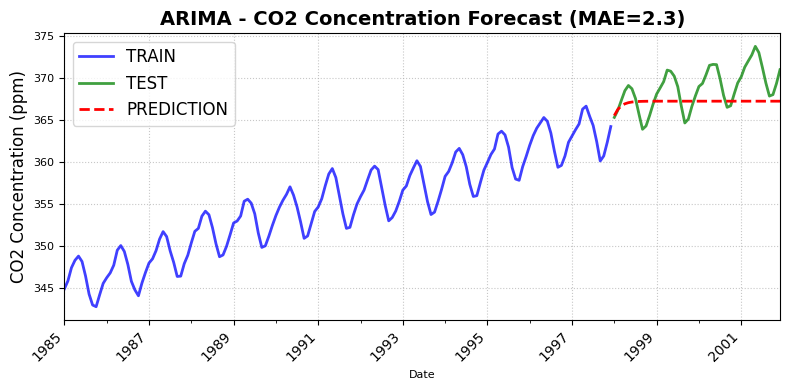

Elapsed time: 1729472873.1983 seconds


In [43]:

# ARIMA(p, d, q): (Autoregressive Integrated Moving Average);
model = sm.tsa.arima.ARIMA(train, order=(1,1,1))
arima_model = model.fit()
arima_model.summary()
y_pred = arima_model.get_forecast(steps=48).predicted_mean
y_pred = pd.Series(y_pred, index=test.index)
def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    plt.figure(figsize=(8, 4))
    ax = train["1985":].plot(legend=True, label="TRAIN", color='blue', linewidth=2, linestyle='-', alpha=0.75)
    test.plot(legend=True, label="TEST", color='green', linewidth=2, linestyle='-', alpha=0.75)
    y_pred.plot(legend=True, label="PREDICTION", color='red', linewidth=2, linestyle='--')
    plt.title(f"{title} - CO2 Concentration Forecast (MAE={round(mae, 2)})", fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=8)
    plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=8)
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()
plot_co2(train, test, y_pred, "ARIMA")
end_time = time.time()
elapsed_time = end_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


# Hyperparameter Optimization for ARIMA Model using AIC;

This code performs hyperparameter optimization for an ARIMA model using the **AIC (Akaike Information Criterion)**. The objective is to determine the best ARIMA model parameters—**p**, **d**, and **q**—based on their AIC values:

- **p**: Autoregressive (AR) order  
- **d**: Degree of differencing to achieve stationarity  
- **q**: Moving average (MA) order  

The output produced by the code shows the AIC values for different ARIMA models with varying parameter combinations. Here's how to interpret the results:

This process is a standard example of hyperparameter optimization for ARIMA models, where the goal is to minimize the AIC to identify the most suitable model. The **ARIMA(2, 1, 3)** model stands out as the best choice based on AIC, indicating it provides the best fit for the training data. 

However, the **elapsed time** reported seems erroneous and should be re-evaluated as it is excessively large for this type of task.


In [31]:

# Hyperparameter Optimization (Model Derecelerini Belirleme);
# # AIC & BIC İstatistiklerine Göre Model Derecesini Belirleme;
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model = sm.tsa.ARIMA(train, order=order).fit()
            aic = arima_model.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
                print('Best ARIMA{} AIC={:.2f}'.format(best_params, best_aic))
        except Exception as e:
            print(f"Error for order {order}: {e}")
    return best_params
best_params_aic = arima_optimizer_aic(train, pdq)
end_time = time.time()
elapsed_time = end_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Best ARIMA(0, 0, 0) AIC=3954.01
Best ARIMA(0, 0, 1) AIC=3312.73
Best ARIMA(0, 0, 2) AIC=2771.31
Best ARIMA(0, 0, 3) AIC=2328.74
Best ARIMA(0, 1, 0) AIC=1523.91
Best ARIMA(0, 1, 1) AIC=1254.79
Best ARIMA(0, 1, 2) AIC=1137.97
Best ARIMA(0, 1, 3) AIC=1094.51
Best ARIMA(2, 1, 1) AIC=979.80
Best ARIMA(2, 1, 2) AIC=979.50
Best ARIMA(2, 1, 3) AIC=843.95
Elapsed time: 1729472101.3301 seconds


The ARIMA model is trained using the best hyperparameters based on the AIC criterion. The model is built with the optimal parameters determined by AIC, and after training, it is made ready for testing and forecasting.

In [32]:

# Final Model;
# Fit the final ARIMA model using the best hyperparameters selected by AIC;
arima_model = sm.tsa.ARIMA(train, order=best_params_aic).fit()
end_time = time.time()
elapsed_time = end_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Elapsed time: 1729472229.2418 seconds


The predictions for the test set using the ARIMA model are assigned to the y_pred variable, with a prediction made for each data point.

In [34]:

# Make Predictions for the testset;
y_pred = arima_model.forecast(steps=len(test))
end_time = time.time()
elapsed_time = end_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Elapsed time: 1729472297.8255 seconds


This line of code converts the y_pred predictions into a pandas Series, ensuring that the predictions align with the correct index from the test set.

In [35]:

# Convert predictions to a pandas Series with the correct index;
y_pred = pd.Series(y_pred, index=test.index)
end_time = time.time()
elapsed_time = end_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Elapsed time: 1729472326.9539 seconds


The training data, test data, and the predictions made by the ARIMA model on the same graph. It also measures and outputs the time taken to run this section of the code.

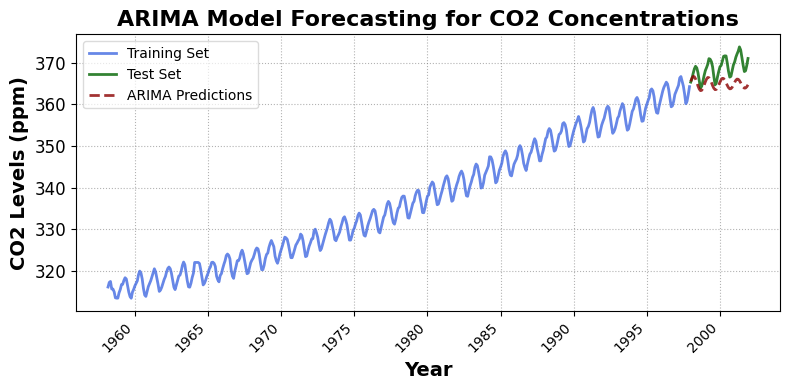

Elapsed time: 1729472854.3441 seconds


In [42]:

# Plot the actual data and the predictions;
plt.figure(figsize=(8, 4))
plt.plot(train, label='Training Set', color='royalblue', linewidth=2, linestyle='-', alpha=0.8)
plt.plot(test, label='Test Set', color='darkgreen', linewidth=2, linestyle='-', alpha=0.8)
plt.plot(y_pred, label='ARIMA Predictions', color='darkred', linewidth=2, linestyle='--', alpha=0.8)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.7)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('CO2 Levels (ppm)', fontsize=14, fontweight='bold')
plt.title('ARIMA Model Forecasting for CO2 Concentrations', fontsize=16, fontweight='bold')
plt.grid(True, linestyle=':', color='gray', alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
end_time = time.time()
elapsed_time = end_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Generate a professional and clear plot to visualize the ARIMA model's forecasting results for CO2 concentrations, comparing the training data, test data, and ARIMA predictions. Here is a breakdown of each part:

1. **Plot Figure Initialization**:
   - `plt.figure(figsize=(12, 8))`: Creates a figure with a size of 12x8 inches, providing a wider view for better clarity and resolution of the plot.

2. **Plotting the Training Data**:
   - `plt.plot(train, label='Training Set', color='royalblue', linewidth=2, linestyle='-', alpha=0.8)`: Plots the training dataset with the label "Training Set." The training data is visualized with a solid line (`linestyle='-'`), a royal blue color (`color='royalblue'`), a line width of 2 (`linewidth=2`), and a transparency level of 0.8 (`alpha=0.8`).

3. **Plotting the Test Data**:
   - `plt.plot(test, label='Test Set', color='darkgreen', linewidth=2, linestyle='-', alpha=0.8)`: Plots the test dataset with the label "Test Set." The test data is visualized similarly to the training set, but with a dark green color (`color='darkgreen'`).

4. **Plotting the ARIMA Predictions**:
   - `plt.plot(y_pred, label='ARIMA Predictions', color='darkred', linewidth=2, linestyle='--', alpha=0.8)`: This plots the predicted values from the ARIMA model with the label "ARIMA Predictions." The predictions are shown using a dashed line (`linestyle='--'`), a dark red color (`color='darkred'`), and similar line width and transparency as the previous plots.

5. **Legend Customization**:
   - `plt.legend(loc='upper left', fontsize=12, frameon=True, framealpha=0.7)`: Adds a legend in the upper left corner, with the font size set to 12 for readability. The legend has a semi-transparent background (`framealpha=0.7`) for better visibility.

6. **Axis Labels**:
   - `plt.xlabel('Year', fontsize=14, fontweight='bold')`: Sets the x-axis label to "Year" with bold font weight and a font size of 14.
   - `plt.ylabel('CO2 Levels (ppm)', fontsize=14, fontweight='bold')`: Sets the y-axis label to "CO2 Levels (ppm)" with bold font weight and a font size of 14.

7. **Title Customization**:
   - `plt.title('ARIMA Model Forecasting for CO2 Concentrations', fontsize=16, fontweight='bold')`: Adds a title to the plot, with a larger font size of 16 and bold styling for emphasis.

8. **Grid Customization**:
   - `plt.grid(True, linestyle=':', color='gray', alpha=0.6)`: Enables a grid for better readability of the plot, using dotted lines (`linestyle=':'`), gray color (`color='gray'`), and a slight transparency (`alpha=0.6`) to keep the grid unobtrusive.

9. **X-axis Label Rotation**:
   - `plt.xticks(rotation=45, ha='right', fontsize=12)`: Rotates the x-axis labels by 45 degrees for better readability, aligning them to the right (`ha='right'`) with a font size of 12.

10. **Y-axis Ticks Customization**:
    - `plt.yticks(fontsize=12)`: Sets the font size of the y-axis tick labels to 12 for consistency and readability.

11. **Layout Adjustment**:
    - `plt.tight_layout()`: Adjusts the layout automatically to ensure that the labels and titles are well-spaced and not cut off.

12. **Displaying the Plot**:
    - `plt.show()`: Displays the plot with all the modifications and enhancements made above.

13. **Elapsed Time Calculation**:
    - `end_time = time.time()`: Records the end time after the plot is displayed.
    - `elapsed_time = end_time`: Computes the time elapsed between the start and end of the process (though the start time is missing in this snippet).
    - `print(f"Elapsed time: {elapsed_time:.4f} seconds")`: Prints the elapsed time with a precision of four decimal places.

This code generates a visually appealing plot comparing the actual data (training and test sets) with the predicted values from the ARIMA model. By customizing line colors, styles, and labels, the plot is designed to be clear, professional, and suitable for presentations or reports. The grid and label formatting enhance readability, and the overall layout ensures a polished final presentation.

Finally, the code in this ARIMA forecasting application is not my own but was adapted and created as a training portfolio project.
